# Spatial Weights

In [1]:
# !pip install folium

In [2]:
import numpy as np
import pandas as pd

# Geospatial analysis
import geopandas as gpd

# Spatial Weights
from libpysal.weights import Queen, Rook, KNN, Kernel
import shapely

# Plotting
import matplotlib.pyplot as plt
import folium

Spatial weights are mathematical structures used to represent spatial relationships. Many spatial analytics, such as spatial autocorrelation statistics and regionalization algorithms rely on spatial weights. Generally speaking, a spatial weight 𝑤𝑖,𝑗 expresses the notion of a geographical relationship between locations 𝑖 and 𝑗 . These relationships can be based on a number of criteria including contiguity, geospatial distance and general distances.

In [3]:
dc_census_block = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2020/BG/tl_2020_11_bg.zip")
dc_census_block.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,11,001,010800,1,110010108001,Block Group 1,G5030,S,112810,0,+38.9005669,-077.0474728,"POLYGON ((-77.05014 38.90033, -77.05013 38.900..."
1,11,001,010900,2,110010109002,Block Group 2,G5030,S,2270174,2933566,+38.8132364,-077.0238475,"POLYGON ((-77.03919 38.80050, -77.03913 38.800..."
2,11,001,007401,1,110010074011,Block Group 1,G5030,S,1029053,200980,+38.8668098,-076.9949201,"POLYGON ((-77.00540 38.86879, -77.00341 38.870..."
3,11,001,007403,1,110010074031,Block Group 1,G5030,S,126738,0,+38.8481009,-076.9774095,"POLYGON ((-76.98127 38.84662, -76.98098 38.846..."
4,11,001,007404,1,110010074041,Block Group 1,G5030,S,360630,0,+38.8514546,-076.9784997,"POLYGON ((-76.98334 38.85337, -76.98277 38.853..."


## Reprojecting to Projected Coordinate System

In [4]:
rprj_dc= dc_census_block.to_crs('26985')

## Type of Weights

### Contiguity based weights

#### Queen Weights

A commonly-used type of weight is a queen contigutiy weight, which reflects adjacency relationships as a binary indicator variable denoting whether or not a polygon shares an edge or a vertex with another polygon. These weights are symmetric, in that when polygon 𝐴 neighbors polygon 𝐵, both 𝑤𝐴𝐵=1 and 𝑤𝐵𝐴=1.

In [5]:
qW = Queen.from_dataframe(rprj_dc)

<ipython-input-5-da5477ec85f0>:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  qW = Queen.from_dataframe(rprj_dc)


All weights objects have a few traits that you can use to work with the weights object, as well as to get information about the weights object.

To get the neighbors & weights around an observation, use the observation's index on the weights object, like a dictionary:

In [54]:
qW[20]

{496: 1.0, 21: 1.0, 554: 1.0, 555: 1.0, 557: 1.0}

By default, the weights and the pandas dataframe will use the same index. So, we can view the observation and its neighbors in the dataframe by putting the observation's index and its neighbors' indexes together in one list:

In [55]:
self_and_neighbors = [20]
self_and_neighbors.extend(qW.neighbors[20])
print(self_and_neighbors)

[20, 496, 21, 554, 555, 557]


In [56]:
rprj_dc.loc[self_and_neighbors]

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
20,11,001,007809,1,110010078091,Block Group 1,G5030,S,255912,0,+38.9017541,-076.9278893,"POLYGON ((405927.041 137245.539, 405942.912 13..."
496,11,001,007804,1,110010078041,Block Group 1,G5030,S,270528,4302,+38.8985775,-076.9350753,"POLYGON ((405274.849 136844.450, 405275.001 13..."
21,11,001,007809,2,110010078092,Block Group 2,G5030,S,279342,0,+38.9013442,-076.9361406,"POLYGON ((404989.104 137132.774, 405013.029 13..."
554,11,001,007806,1,110010078061,Block Group 1,G5030,S,294019,0,+38.9059712,-076.9290685,"POLYGON ((405804.287 137979.101, 405823.616 13..."
555,11,001,007806,2,110010078062,Block Group 2,G5030,S,377415,0,+38.9052976,-076.9352658,"POLYGON ((404956.402 137133.864, 405001.479 13..."
557,11,001,007807,2,110010078072,Block Group 2,G5030,S,281391,0,+38.8991961,-076.9232083,"POLYGON ((406396.272 136535.897, 406407.342 13..."


Since weight matrices are typically very sparse, there is also a sparse weights matrix constructor:

In [34]:
qW.sparse 

<571x571 sparse matrix of type '<class 'numpy.float64'>'
	with 3618 stored elements in Compressed Sparse Row format>

<AxesSubplot:>

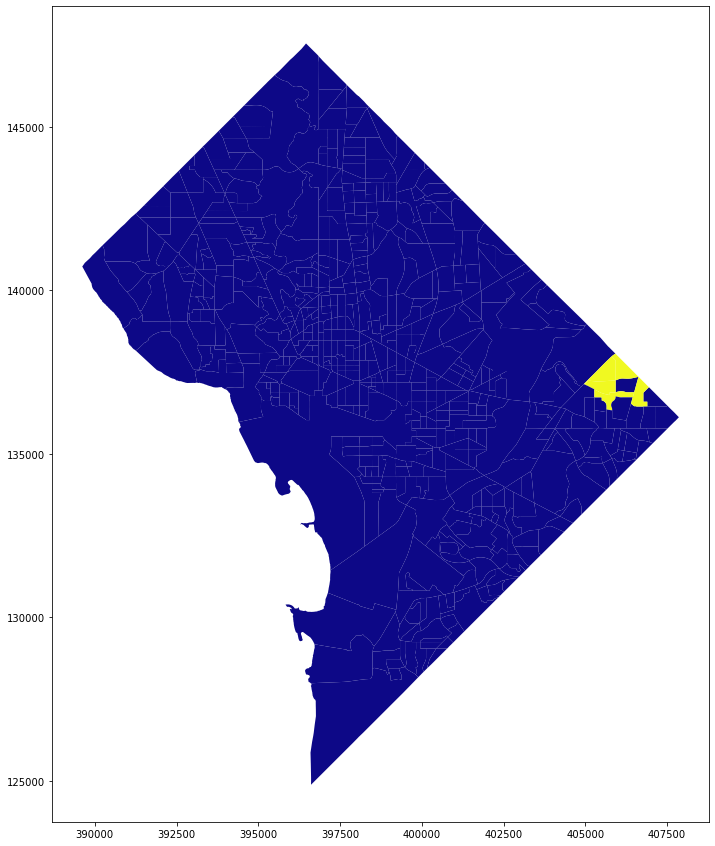

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Plot the neighbors of the 21-th (index is 20) census block in `rprj_dc`, which is surrounded by its yellow neighboring blocks.  
rprj_dc.assign(weights = qW.sparse[20,:].toarray().flatten()).plot('weights', cmap='plasma', ax = ax)

#### Rook Weights

Rook weights are another type of contiguity weight, but consider observations as neighboring only when they share an edge. The rook neighbors of an observation may be different than its queen neighbors, depending on how the observation and its nearby polygons are configured.

In [11]:
rW = Rook.from_dataframe(rprj_dc)

<ipython-input-11-563c2315530b>:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  rW = Rook.from_dataframe(rprj_dc)


<AxesSubplot:>

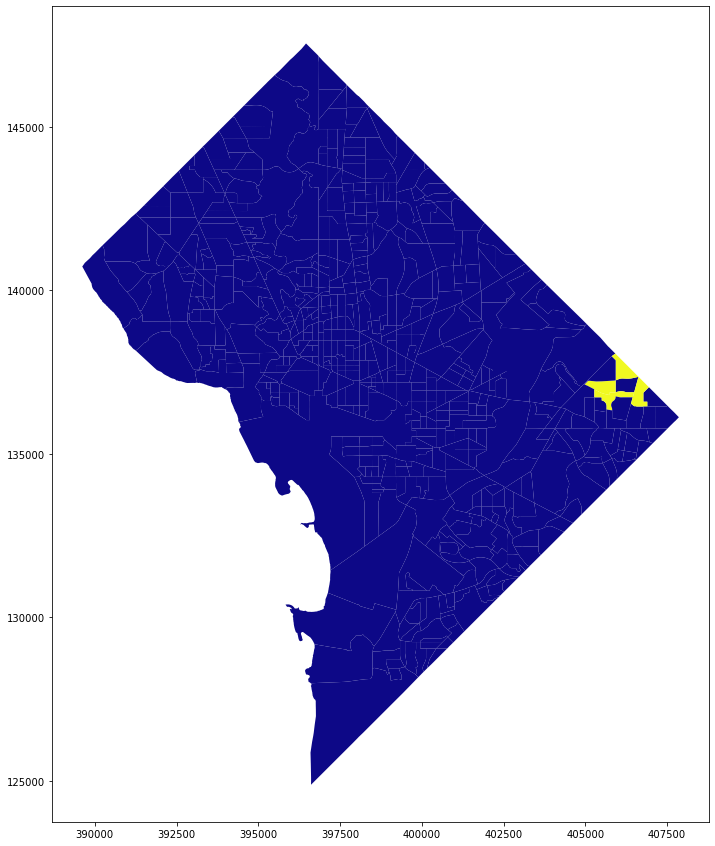

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Plot the neighbors of the 21-th (index is 20) census block in `rprj_dc`, which is surrounded by its yellow neighboring blocks.
rprj_dc.assign(weights = rW.sparse[20,:].toarray().flatten()).plot('weights',cmap='plasma', ax = ax)

### Distance based weights



In addition to contiguity, we can also define neighbor relations as a function of the distance separating spatial observations. Usually, this means that a matrix expressing the distances between all pairs of observations are required. These are then provided to a kernel function which uses the proximity information to model proximity as a smooth function of distance.

#### K-nearest neighbor weights

<AxesSubplot:>

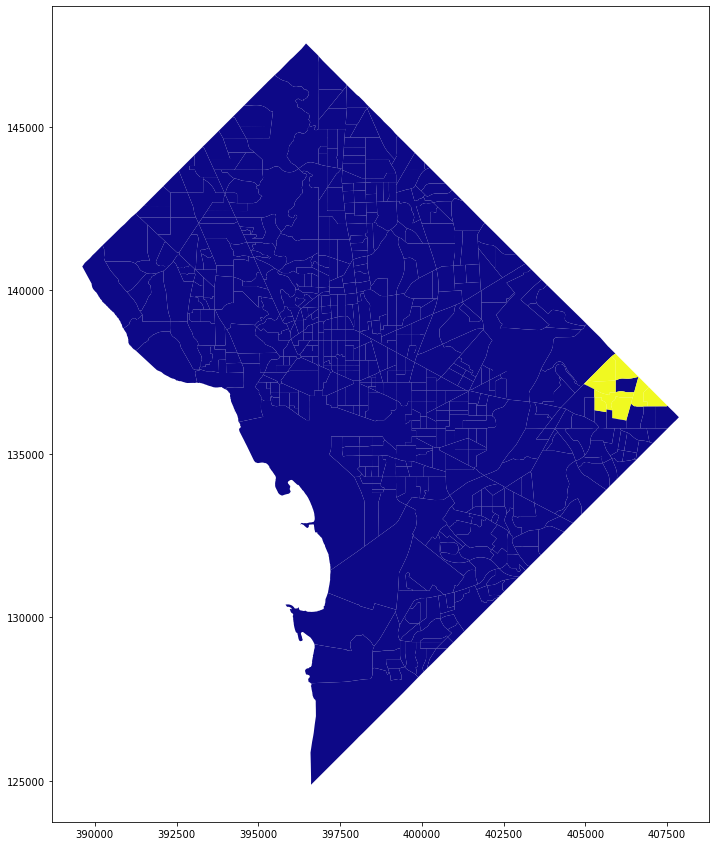

In [38]:
dc_knn8 = KNN.from_dataframe(rprj_dc, k=8)
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Plot the neighbors of the 21-th (index is 20) census block in `rprj_dc`, which is surrounded by its yellow neighboring blocks.
rprj_dc.assign(weights = dc_knn8.sparse[20,:].toarray().flatten()).plot('weights',cmap='plasma', ax = ax)

#### Kernel weights

Kernel weights are one of the most commonly-used kinds of distance weights. They reflect the case where similarity/spatial proximity is assumed or expected to decay with distance. The essence of kernel weights is that the weight between observations and is based on their distance, but it is further modulated by a kernel function with certain properties.

<AxesSubplot:>

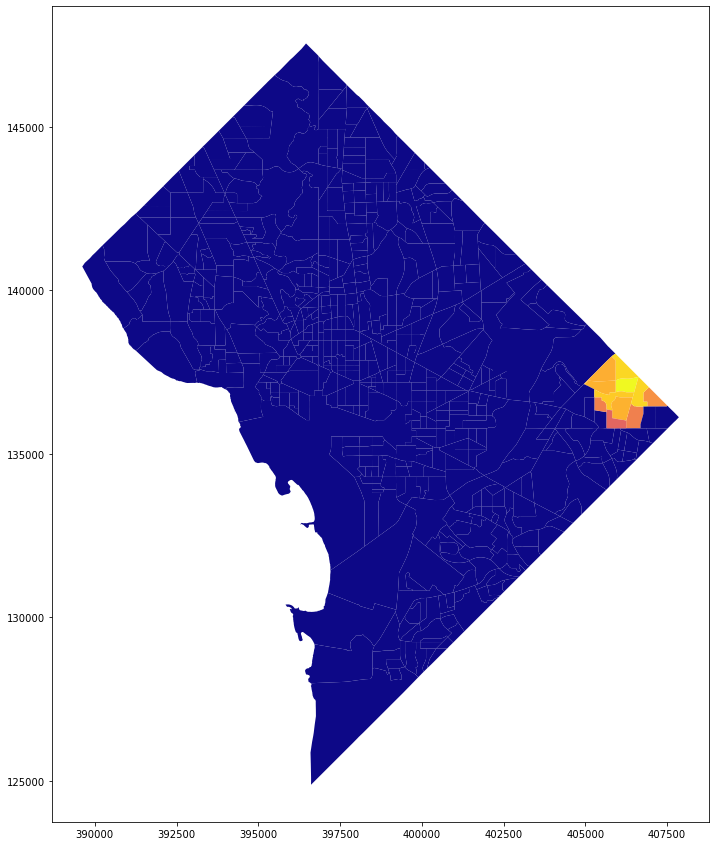

In [51]:
# Adaptive bandwidth
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
kernelWa = Kernel.from_dataframe(rprj_dc, k=10, fixed=False, function='gaussian')

# A bit different from the above; the sparse matrix of kernel weight includes self-neighbor and assign its weight to the highest value, 1, so the brightest yellow block is the self-neighbor.
rprj_dc.assign(weights = kernelWa.sparse[20,:].toarray().flatten()).plot('weights', cmap='plasma', ax = ax)

<AxesSubplot:>

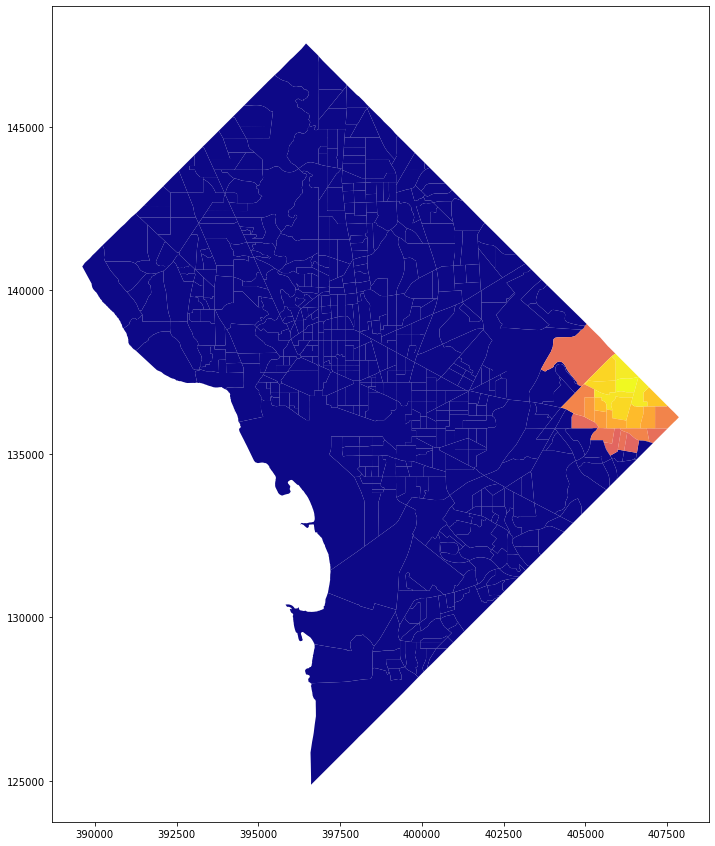

In [57]:
# Fixed bandwidth
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
kernelWf = Kernel.from_dataframe(rprj_dc, k=2, fixed=True, function='gaussian')

rprj_dc.assign(weights=kernelWf.sparse[20,:].toarray().flatten()).plot('weights', cmap='plasma', ax = ax)

## Visualization of blocks and their neighbours based on Queen, Rook, KNN

In [41]:
def style_function(feature):
    return {
        'fillColor': 'orange',
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7
    }

# Define a highlight function to set the color on hover
def highlight_function(feature):
    return {
        'fillColor': 'red',  # Color for the hovered block
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.7
    }

In [42]:
dc_census_block['queen_neighbors'] = [qW.neighbors[idx] for idx in dc_census_block.index]
dc_census_block['rook_neighbors'] = [rW.neighbors[idx] for idx in dc_census_block.index]
dc_census_block['knn_neighbors'] = [dc_knn8.neighbors[idx] for idx in dc_census_block.index]

In [43]:
dc_census_block['queen_neighbors'] = dc_census_block['queen_neighbors'].astype(str)
dc_census_block['rook_neighbors'] = dc_census_block['rook_neighbors'].astype(str)
dc_census_block['knn_neighbors'] = dc_census_block['knn_neighbors'].astype(str)

In [44]:

# Create a folium map centered around DC
dc_map = folium.Map(location=[dc_census_block.geometry.centroid.y.mean(), dc_census_block.geometry.centroid.x.mean()], zoom_start=11)

# Add the GeoJson layer for the blocks with Queen, Rook, and KNN neighbors information
folium.GeoJson(dc_census_block, name='geojson',
               #style_function=lambda x: {'fillColor': 'orange'},
               style_function=style_function,
               highlight_function=highlight_function,
               tooltip=folium.features.GeoJsonTooltip(
                   fields=['GEOID', 'queen_neighbors', 'rook_neighbors', 'knn_neighbors'],
                   aliases=['Block ID', 'Queen Neighbors', 'Rook Neighbors', 'KNN Neighbors'],
                   sticky=True,
                   localize=True,
                   labels=True,
                   style="font-weight: bold;",
                   highlight= True
               )).add_to(dc_map)

# Save the map to an HTML file
# dc_map.save("dc_map_with_neighbors.html")

<ipython-input-44-4c33b1d03eca>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dc_map = folium.Map(location=[dc_census_block.geometry.centroid.y.mean(), dc_census_block.geometry.centroid.x.mean()], zoom_start=11)


In [45]:
dc_map